In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tf_ds
import tensorflow_core

In [2]:
# Prepare the datasets :

In [3]:
def map_image(image,label):
    image = tf.cast(image,dtype=tf.float32)
    image = image/255.0
    image = tf.reshape(image,shape=(28*28*1,))
    return image, image
    



In [4]:
# Load the Train and Test datasets from Tensorflow datasets :

In [5]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

In [6]:
train_datasets = tf_ds.load("mnist",as_supervised=True,split='train')
train_datasets = train_datasets.map(map_image)
train_datasets = train_datasets.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


In [7]:
test_dataset = tf_ds.load("mnist",as_supervised=True,split='test')
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


In [8]:
# Build the Model : 

In [9]:
def simple_autoencoder(inputs):
    # Build Encoder-Decoder using Dense Model 
    encoder = keras.layers.Dense(units=32, activation='relu')(inputs)
    decoder = keras.layers.Dense(units=28*28*1,activation='sigmoid')(encoder)
    return encoder, decoder
    

In [10]:
# Sets the input shape :
input_ = tf.keras.Input(shape=(28*28*1,))

In [11]:
# Get encoder & Decoder output :

In [12]:
encoder_output, decoder_output = simple_autoencoder(input_)

In [13]:
encoder_model = tf.keras.Model(inputs=input_,outputs=encoder_output)

In [14]:
autoencoder_model = tf.keras.Model(inputs=input_,outputs=decoder_output)

In [15]:
# Compile the Model :

In [16]:
autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy')

In [17]:
# Fit the encoder model :

In [18]:
train_steps = 1000
simple_auto_history = autoencoder_model.fit(train_datasets,steps_per_epoch=train_steps,epochs=50)

Train for 1000 steps
Epoch 1/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1825
Epoch 2/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.1120
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0990
Epoch 4/50
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0953
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0943
Epoch 6/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0938
Epoch 7/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0935
Epoch 8/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0933
Epoch 9/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0933
Epoch 10/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0932
Epoch 11/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0931
Epoch 12/50
1000/1000 [===================

In [19]:
simple_auto_history.history

{'loss': [0.18248987193403393,
  0.11197136535592053,
  0.09897871420585018,
  0.09531158739966474,
  0.09427695806926045,
  0.09376523009743197,
  0.09353549985318496,
  0.09334081692459406,
  0.09326536697393778,
  0.09317054352413243,
  0.0930849613119597,
  0.0930778491140724,
  0.09301137297287054,
  0.09298653550457214,
  0.09291509049886343,
  0.09287947305022164,
  0.09283233477196853,
  0.0927949514167347,
  0.0927746229194265,
  0.09279241710863989,
  0.09272642337855487,
  0.09271116967146667,
  0.09262550754571873,
  0.0926611544513118,
  0.09258911193997459,
  0.09257147444776441,
  0.09256474748850167,
  0.0925427976773941,
  0.09251540426673623,
  0.09248340166192046,
  0.09244457554572637,
  0.09240099917789768,
  0.09238948976027482,
  0.09238358925452168,
  0.09238780625332231,
  0.09234401741889252,
  0.09233181286843614,
  0.09229348735240271,
  0.09229167734178202,
  0.09226085738339025,
  0.09221387971910075,
  0.09223485333083749,
  0.09224468857057397,
  0.09221

### Display sample Results :

In [20]:
def display_one_row(display_img,offset,shape=(28,28)):
    for i,test_img in enumerate(display_img):
        plt.subplot(3,10,offset + i+ 1)
        plt.xticks([])
        plt.yticks([])
        test_img = np.reshape(test_img,shape)
        plt.imshow(test_img,cmap='gray')

In [29]:
def display_result(input_img,encoded_img,decoded_img,encoded_shape=(8,4)):
    plt.figure(figsize=(15,5))
    display_one_row(input_img,0,shape=(28,28,))
    display_one_row(encoded_img,1,shape=encoded_shape)
    display_one_row(decoded_img,shape=(28,28))
    

ERROR! Session/line number was not unique in database. History logging moved to new session 641


### Test datasets : Take 1 Batch of Image :

In [30]:
test_dataset = test_dataset.take(1)


In [31]:
# Take the input image from test data of Tensorflow datasets (mnist) & Enter them into list :


In [32]:
output_smaples = []


In [33]:
for input_image, image in tf_ds.as_numpy(test_dataset):
    output_smaples = input_image

In [34]:
encoded_prediction = encoder_model.predict(test_dataset)

In [39]:
idxs = np.random.choice(56, size=10)

ERROR! Session/line number was not unique in database. History logging moved to new session 643


In [40]:
final_prediction_decoder = autoencoder_model.predict(test_dataset)

D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-2ff5aff7bdcc>", line 1, in <module>
    display_result(output_smaples[idxs],encoded_prediction[idxs],final_prediction_decoder[idxs])
  File "<ipython-input-29-472f4dff2a62>", line 5, in display_result
    display_one_row(decoded_img,shape=(28,28))
TypeError: display_one_row() missing 1 required positional argument: 'offset'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\SOFTWARE\Anaconda\envs\gpu_tf\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):


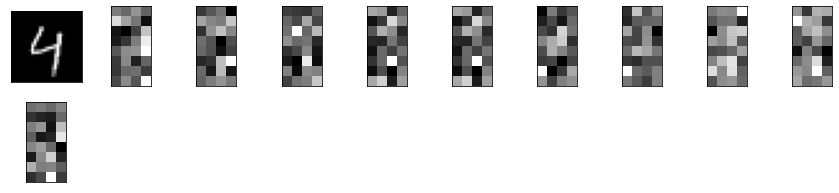

In [ ]:
display_result(output_smaples[idxs],encoded_prediction[idxs],final_prediction_decoder[idxs])